In [1]:
import pandas as pd
import numpy as np
import tensorflow
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout
import io
import requests
import os
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
print('done')


done


In [2]:

def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        # Convert to numeric data type, replacing non-convertible values with NaN
        df[name] = pd.to_numeric(df[name], errors='coerce')
        mean = df[name].mean()
    if sd is None:
        # Convert to numeric data type, replacing non-convertible values with NaN
        df[name] = pd.to_numeric(df[name], errors='coerce')
        sd = df[name].std()
    df[name] = (df[name] - mean) / sd


def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    
print('done')

done


In [3]:

path='kddcup.data.txt'

column_names = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

df = pd.read_csv(path, header=None, names=column_names,on_bad_lines='warn',skiprows=1)
pd.set_option('display.max_columns', 42)

df.head(5)


Skipping line 4817100: expected 42 fields, saw 56



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_text_dummy(df, 'land')
encode_text_dummy(df, 'logged_in')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
print('done')

done


In [5]:
encode_numeric_zscore(df, 'duration')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')
print("done")

done


In [6]:
df.dropna(inplace=True,axis=1)
print('done')


done


In [7]:
df['outcome'].value_counts()

outcome
smurf.              2807886
neptune.            1072017
normal.              972779
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [8]:
attack_mapping = {
    'normal.': 'normal',
    'smurf.': 'dos',
    'neptune.': 'dos',
    'land.':'dos',
    'pod.':'dos',
    'teardrop.':'dos',
    'back.':'dos',
    'buffer_overflow.': 'other',
    'loadmodule.': 'other',
    'perl.': 'other',
    'rootkit.':'other',
    'spy.':'other',
    'guess_passwd.': 'other',
    'ftp_write.':'other',
    'phf.':'other',
    'imap.':'other',
    'multihop.':'other',
    'warezmaster.':'other',
    'warezclient.':'other',
    'portsweep.': 'probe',
    'ipsweep.':'probe',
    'nmap.':'probe',
    'satan.':'probe'
    
}

# Create the new column based on the mapping
df['outcome_five'] = df['outcome'].map(attack_mapping)


C:\Users\teo22\AppData\Local\Temp\ipykernel_7300\2127607741.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['outcome_five'] = df['outcome'].map(attack_mapping)


In [9]:
df['outcome_five'].value_counts()

outcome_five
dos       3883370
normal     972779
probe       41102
other        1178
Name: count, dtype: int64

In [10]:
df = df.drop('outcome', axis=1)


In [11]:
# Classification
x_columns = df.columns.drop('outcome_five')
x = df[x_columns].values.astype(np.float32)

dummies = pd.get_dummies(df['outcome_five']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)

y = dummies.values.astype(np.float32)
print('done')

done


In [12]:
dummies.value_counts()

dos    normal  other  probe
True   False   False  False    3883370
False  True    False  False     972779
       False   False  True       41102
               True   False       1178
Name: count, dtype: int64

In [13]:
unique_arrays = np.unique(y, axis=0)
num_unique_arrays = unique_arrays.shape

In [14]:
x.shape

(4898429, 125)

In [15]:
y.shape

(4898429, 4)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)
print('done')

done


In [18]:
model = Sequential()
model.add(Dense(21, input_dim=x.shape[1], activation='tanh'))
model.add(Dropout(0.2)) # Dropout regularization with 20% dropout rate

model.add(Dense(21, input_dim=x.shape[1], activation='tanh'))
model.add(Dropout(0.2)) # Dropout regularization with 20% dropout rate

model.add(Dense(y.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size = 32, callbacks=[monitor],verbose=2,epochs=100)

Epoch 1/100
122461/122461 - 98s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0016 - val_accuracy: 0.9996 - 98s/epoch - 802us/step
Epoch 2/100
122461/122461 - 99s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 0.9997 - 99s/epoch - 805us/step
Epoch 3/100
122461/122461 - 103s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0012 - val_accuracy: 0.9998 - 103s/epoch - 840us/step
Epoch 4/100
122461/122461 - 101s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 0.9998 - 101s/epoch - 824us/step
Epoch 5/100
122461/122461 - 103s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 0.9998 - 103s/epoch - 838us/step
Epoch 6/100
Restoring model weights from the end of the best epoch: 1.
122461/122461 - 102s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0012 - val_accuracy: 0.9998 - 102s/epoch - 836us/step
Epoch 6: early stopping


In [62]:
y_pred_nn = model.predict(x_test).astype(np.float32)


30616/30616 [==============================] - 16s 509us/step


In [64]:
y_pred_nn = np.argmax(y_pred_nn, axis=1).astype(np.float32)

In [24]:
y_true = np.argmax(y_test, axis=1).astype(np.float32)
y_true.shape

(3918743,)

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_nn)

# # Calculate precision
precision = precision_score(y_true, y_pred_nn, average='macro')

# # Calculate recall
recall = recall_score(y_true, y_pred_nn, average='macro')

# # Calculate F1 score
f1 = f1_score(y_true, y_pred_nn, average='macro')

print("MLP Accuracy:", accuracy)
print("MLP Precision:", precision)
print("MLP Recall:", recall)
print("MLP F1 score:", f1)

MLP Accuracy: 0.9996304938521118
MLP Precision: 0.9687384359232601
MLP Recall: 0.8789972853173651
MLP F1 score: 0.9124548960014025


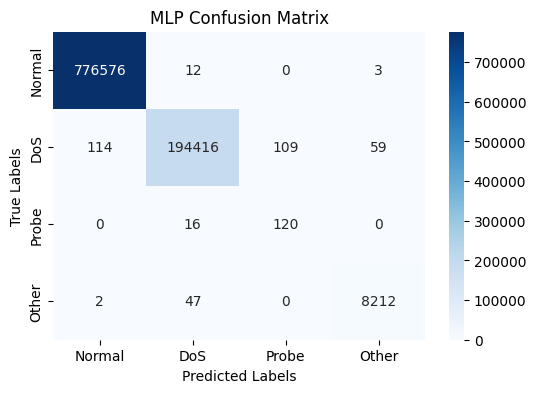

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_pred_nn, y_true)

class_labels=["Normal","DoS","Probe","Other"]
# Create a heatmap plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=class_labels, yticklabels=class_labels)

# Set plot labels
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

rf_clf = RandomForestClassifier(n_estimators=100, min_impurity_decrease=0.001, random_state=1, verbose=2,class_weight = "balanced")
print("starting training...")
# Train the classifier on the training data
rf_clf.fit(x_train, y_train)




starting training...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.5min finished


RandomForestClassifier(class_weight='balanced', min_impurity_decrease=0.001,
                       random_state=1, verbose=2)

In [52]:
# Make predictions on the testing data
y_pred_rf = rf_clf.predict(x_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.5s finished


In [53]:
y_pred_rf = np.argmax(y_pred_rf, axis=1).astype(np.float32)


In [51]:
y_true=np.argmax(y_test, axis=1).astype(np.float32)
y_true.shape

(979686,)

In [54]:
y_pred_rf.shape

(979686,)

In [55]:
y_true.shape

(979686,)

In [59]:
# Calculate accuracy
accuracy = accuracy_score( y_true,y_pred_rf,)

# # Calculate precision
precision = precision_score( y_true,y_pred_rf, average='macro')

# # Calculate recall
recall = recall_score(y_true,y_pred_rf, average='macro')

# # Calculate F1 score
f1 = f1_score( y_true,y_pred_rf, average='macro')

print("RF Accuracy:", accuracy)
print("RF Precision:", precision)
print("RF Recall:", recall)
print("RF F1 score:", f1)

RF Accuracy: 0.9845205504620869
RF Precision: 0.6489705938676525
RF Recall: 0.9829336101648478
RF F1 score: 0.6943184118177554


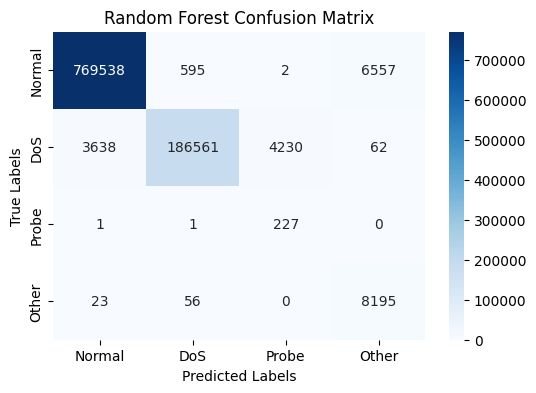

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_rf)

class_labels=["Normal","DoS","Probe","Other"]

# Create a heatmap plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=class_labels, yticklabels=class_labels)

# Set plot labels
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()